# What is missing values

Missing data means that one or more variables ( features ) values are missing generally encoded by -999 , nan , null . . . it often occurs while collecting the data in a wrong way , a lack of data ( Ex : users rating ) , or errors when entering the data ( mistyping ) , and this could lead to drastic findings and conclusions which could affect negatively the decisions !

### Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

## Types of missing data:
1) Missing Completely and Random — (MCAR).

2) Missing at Random — (MAR).

3) Missing Not at Random — (MNAR).

### 1) Missing Completely at Random (MCAR):
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

There’s no relationship between whether a data point is missing and any values in the data set (missing or observed) .The missing data are just a random subset of the data . The missingness is nothing to do with any other variable . By the way , data are rarely MCAR.

It is relatively easy to check the assumption that in our example data is missing completely at random. If you can predict any reason for missing data (e.g., using common sense, regression, or some other method) whether based on the complete variable Age or the Missing variable IQ score , then the data is not MCAR !

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2)Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

Data will be missing based on the missing column itself

In [4]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [5]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### 3)Missing At Random(MAR)
The missing data here is affected only by the complete (observed ) variables and not by the characteristics of the missing data itself. in other words , for a data point , to be missing is not related to the missing data, but it is related to some of ( or all ) the observed data 

Men---hide their salary

Women---hide their age

### Problem occurs because of missing values
The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data. 

Second, the lost data can cause bias in the estimation of parameters. 

Third, it can reduce the representativeness of the samples.

### Method of treating missing values

#### Method 1: Deletion
it falls under two different techniques :
##### Listwise Deletion : 
In this method, an entire record is excluded from analysis if any single value is missing , and therefore we have the same N (number of records) for all analysis.
###### Pairwise Deletion : 
During our analysis the number of records taken into consideration denoted “N” will vary according to the studied variable (column) , and for instance we could compute the mean for 2 features (Complete VS missing) and while dividing by the number of samples , we end up dividing by different N , one is the total number of rows and the other is the total number on complete values on the missing feature .

#### Method 2: Single Imputation Methods
##### Single value imputation : 
Replacing the missing value with a single value utilizing one strategy such as : Mean , Median , Most Frequent , Mean Person , … of the corresponding feature.
##### Similarity : 
Trying to find the closest ( top-N closer ) row(s) to the row containing our missing value , and fix a strategy among them to assign a value to our missing value .
##### Regression Imputation :
In single regression imputation the imputed value is predicted from a regression equation , we assume that the missing values are in a regression line with a nonzero slope with one of the complete features ( predictors )

#### Method 3: Multiple Imputation Methods
##### Expectation-
Maximization Algorithm : an algorithm that could be used for both missing data imputation and for machine learning clustering task (considering the target as a missing feature) 

it is based on two steps :

— First : Expectation of missing value

— Second : Maximizing the likelihood

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# Missing value treatment for continuos variable

## 1)Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables for categorical ,mean when no outliers,median when outliers are there.

In [7]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [9]:
median=df.Age.median()
median
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


14.526497332334044
13.019696550973194


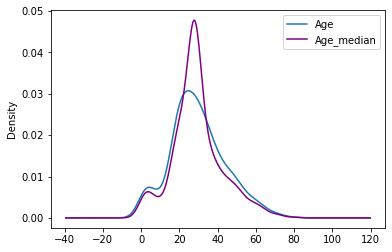

In [12]:
print(df['Age'].std())
print(df['Age_median'].std())
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

##### Advantages And Disadvantages of Mean/Median Imputation
###### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
###### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

## 2)Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [14]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
print(df.head())
print(df.isnull().sum())
print(df.isnull().mean())

   Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500
Survived      0
Age         177
Fare          0
dtype: int64
Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64


In [15]:
df['Age'].isnull().sum()

177

In [17]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [20]:
median=df.Age.median()

impute_nan(df,"Age",median)

df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


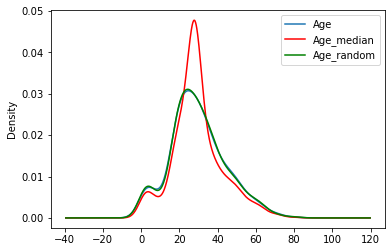

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

###### Advantages
1. Easy To implement
2. There is less distortion in variance.
###### Disadvantage
1. Every situation randomness wont work

## 3)Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [24]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])


import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [25]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


##### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## 4)End of Distribution imputation

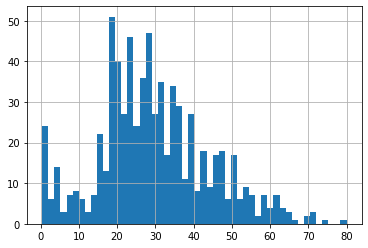

In [28]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.Age.hist(bins=50)
plt.show()

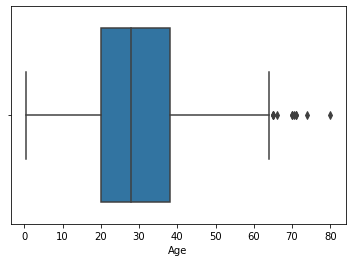

In [30]:
import seaborn as sns
sns.boxplot('Age',data=df)
plt.show()

In [31]:
extreme=df.Age.mean()+3*df.Age.std()

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [32]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


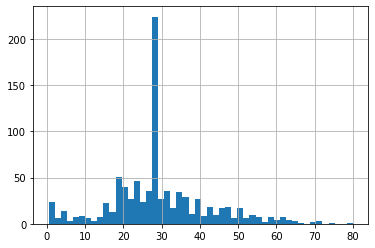

In [33]:
df['Age'].hist(bins=50)
plt.show()

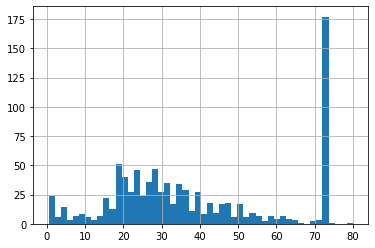

In [34]:
df['Age_end_distribution'].hist(bins=50)
plt.show()

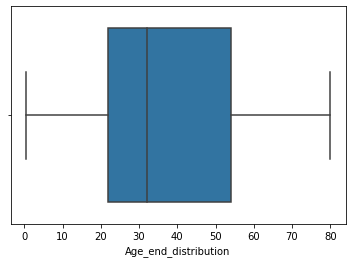

In [35]:
sns.boxplot('Age_end_distribution',data=df)
plt.show()

##### Advantage:
1. Easy to implement.
2. Capture the importance of missingess if is anyone
##### Disadvantage:
1. Distorts the original distribution of the variable.
2. If missingess is not important,it may mask the predictive power of the original variable by distorting its distribution.
3. If no. of NA is big ,it will mask true outliers in the distribution.
4. If the no. of NA is small,the replaced NA may be considered an outlier and preprocessed in a subsequent way of feature engineering.

## 5)Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [37]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()


def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

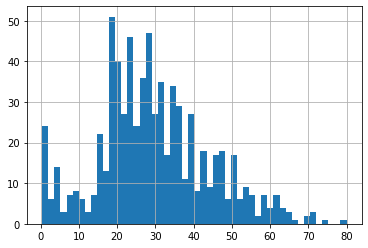

In [39]:
df['Age'].hist(bins=50)
plt.show()

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

# Missing value treatment for Descrete variable

### 1) Mode Imputation

In [49]:
df=pd.read_csv("titanic.csv", usecols=["Sex","Cabin","Survived"])
df.head()

,Survived,Sex,Cabin
0,0,male,NaN
1,1,female,C85
2,1,female,NaN
3,1,female,C123
4,0,male,NaN


In [50]:
df.isnull().sum()

Survived      0
Sex           0
Cabin       687
dtype: int64

In [52]:
df.Cabin.mode()[0]

'B96 B98'

In [53]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

### 2) Adding a variable to capture NAN

In [54]:
df=pd.read_csv("titanic.csv", usecols=["Sex","Cabin","Survived"])
df.head()

,Survived,Sex,Cabin
0,0,male,NaN
1,1,female,C85
2,1,female,NaN
3,1,female,C123
4,0,male,NaN


In [55]:
import numpy as np
df['Cabin_Var']=np.where(df['Cabin'].isnull(),1,0)
df.head()

,Survived,Sex,Cabin,Cabin_Var
0,0,male,NaN,1
1,1,female,C85,0
2,1,female,NaN,1
3,1,female,C123,0
4,0,male,NaN,1


### 3) Replace NAN with a new category

In [56]:
df=pd.read_csv("titanic.csv", usecols=["Sex","Cabin","Survived"])
df.head()

,Survived,Sex,Cabin
0,0,male,NaN
1,1,female,C85
2,1,female,NaN
3,1,female,C123
4,0,male,NaN


In [61]:
df['Cabin'+"newvar"]=np.where(df['Cabin'].isnull(),"Missing",df['Cabin'])

In [62]:
df.head()

,Survived,Sex,Cabin,Cabinnewvar
0,0,male,NaN,Missing
1,1,female,C85,C85
2,1,female,NaN,Missing
3,1,female,C123,C123
4,0,male,NaN,Missing


In [63]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,Survived,Sex,Cabinnewvar
0,0,male,Missing
1,1,female,C85
2,1,female,Missing
3,1,female,C123
4,0,male,Missing
